<a href="https://colab.research.google.com/github/punyamsingh/IRIS/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Load CSV data
csv_file = '/content/multilabel_classification(2).csv'
csv_data = pd.read_csv(csv_file)

# Load JSON data
json_file = '/content/image_tags.json'
with open(json_file, 'r') as f:
    image_tags_mapping = json.load(f)

# Filter CSV data to only include images present in JSON
csv_data = csv_data[csv_data['Image_Name'].isin(image_tags_mapping.keys())]
print(csv_data)


         Image_Name  \
0        image1.jpg   
1        image2.jpg   
2        image3.jpg   
3        image4.jpg   
4        image5.jpg   
...             ...   
4664  image4665.jpg   
4665  image4666.jpg   
4666  image4667.jpg   
4667  image4668.jpg   
4668  image4669.jpg   

      Classes(motorcycle, truck, boat, bus, cycle, person, desert, mountains, sea, sunset, trees, sitar, ektara, flutes, tabla, harmonium)  \
0                                            bus person                                                                                      
1                                                 sitar                                                                                      
2                                                flutes                                                                                      
3                                             bus trees                                                                                      
4            

In [12]:
# Step 1: Strip whitespace from column names to remove any hidden spaces or newline characters
csv_data.columns = csv_data.columns.str.strip()

# Print the column names again to confirm the exact format
# print("Column names:", csv_data.columns)

# Updated function to generate relevance data
def generate_relevance_data(csv_data):
    relevance_data = {}

    # Try to access the column by its cleaned name
    column_name = 'Classes(motorcycle, truck, boat, bus, cycle, person, desert, mountains, sea, sunset, trees, sitar, ektara, flutes, tabla, harmonium)'

    for _, row in csv_data.iterrows():
        image_name = row['Image_Name']
        # print(image_name)  # Debug: Print image name

        try:
            # Access the column using the cleaned column name
            classes = str(row[column_name]).split()  # Get the true tags for the image
            relevance_data[image_name] = classes
        except KeyError:
            print(f"Column '{column_name}' not found. Available columns are: {csv_data.columns}")
            break  # Break out of the loop if the column name is incorrect

    return relevance_data

# Generate the relevance data
relevance_data = generate_relevance_data(csv_data)

# Print the output to verify
print(relevance_data)
print(len(relevance_data))


{'image1.jpg': ['bus', 'person'], 'image2.jpg': ['sitar'], 'image3.jpg': ['flutes'], 'image4.jpg': ['bus', 'trees'], 'image5.jpg': ['bus'], 'image6.jpg': ['sitar', 'ektara', 'tabla'], 'image7.jpg': ['sitar', 'tabla'], 'image8.jpg': ['sitar', 'ektara', 'tabla'], 'image9.jpg': ['person', 'tabla'], 'image10.jpg': ['sitar'], 'image11.jpg': ['tabla', 'harmonium'], 'image12.jpg': ['person', 'harmonium'], 'image13.jpg': ['tabla'], 'image14.jpg': ['tabla'], 'image15.jpg': ['sitar', 'ektara', 'flutes', 'tabla', 'harmonium'], 'image16.jpg': ['bus'], 'image17.jpg': ['person', 'flutes'], 'image18.jpg': ['person', 'sitar', 'tabla', 'harmonium'], 'image19.jpg': ['sitar', 'tabla', 'harmonium'], 'image20.jpg': ['harmonium'], 'image21.jpg': ['person', 'ektara'], 'image22.jpg': ['sitar'], 'image23.jpg': ['sitar'], 'image24.jpg': ['sitar'], 'image25.jpg': ['ektara'], 'image26.jpg': ['tabla'], 'image27.jpg': ['bus'], 'image28.jpg': ['person', 'tabla', 'harmonium'], 'image29.jpg': ['sitar', 'tabla', 'harmo

In [13]:
# Initialize models
tfidf_vectorizer = TfidfVectorizer()
st_model = SentenceTransformer('all-mpnet-base-v2')

def get_literal_similarity(query, image_tags):
    all_tags = ' '.join(image_tags)
    X = tfidf_vectorizer.fit_transform([query, all_tags])
    return 1 - cosine(X[0].toarray().flatten(), X[1].toarray().flatten())

def get_semantic_similarity(query, image_tags):
    query_embed = st_model.encode(query)
    tags_embed = st_model.encode(image_tags)
    tags_mean_embed = np.mean(tags_embed, axis=0)
    return 1 - cosine(query_embed, tags_mean_embed)

def rank_images(query, threshold=0.2):
    similarity_scores = []
    for filename, tags in image_tags_mapping.items():
        literal_sim = get_literal_similarity(query, tags)
        semantic_sim = get_semantic_similarity(query, tags)
        total_score = literal_sim + semantic_sim
        if total_score >= threshold:
            similarity_scores.append((filename, total_score))
    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    return similarity_scores


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def calculate_dcg(relevances, k):
    return sum((2**rel - 1) / np.log2(i + 2) for i, rel in enumerate(relevances[:k]))

def evaluate_model(query, relevance_data, top_k=10):
    # Model's ranked list
    ranked_images = rank_images(query, 0.4)
    ranked_image_names = [img for img, _ in ranked_images[:top_k]]

    # Create binary relevance scores for model's ranked list
    relevance_scores = []
    for img in ranked_image_names:
        relevance_scores.append(int(any(tag in query for tag in relevance_data[img])))

    # Ideal ranked list based on relevance data
    ideal_ranking = sorted(
        relevance_data.keys(),
        key=lambda img: int(any(tag in query for tag in relevance_data[img])),
        reverse=True
    )
    ideal_ranking = ideal_ranking[:top_k]

    # Calculate Precision, Recall, F1
    precision = sum(relevance_scores) / top_k
    recall = sum(relevance_scores) / len(relevance_data)  # All relevant images for this query
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Calculate DCG and NDCG
    dcg = calculate_dcg(relevance_scores, top_k)
    idcg = calculate_dcg(sorted(relevance_scores, reverse=True), top_k)
    ndcg = dcg / idcg if idcg > 0 else 0

    # Print results
    print(f"Query: {query}")
    print(f"Precision@{top_k}: {precision:.4f}, Recall@{top_k}: {recall:.4f}, F1@{top_k}: {f1:.4f}")
    print(f"DCG@{top_k}: {dcg:.4f}, NDCG@{top_k}: {ndcg:.4f}")

    # Print model's ranked list and ideal ranked list
    print("\nModel's Ranked List:")
    for i, img in enumerate(ranked_image_names, 1):
        print(f"{i}. {img} - Relevance: {relevance_scores[i-1]}")

    print("\nIdeal Ranked List:")
    for i, img in enumerate(ideal_ranking, 1):
        ideal_relevance = int(any(tag in query for tag in relevance_data[img]))
        print(f"{i}. {img} - Relevance: {ideal_relevance}")

    return precision, recall, f1, ndcg

# Example query evaluation
query = "bus trees"
evaluate_model(query, relevance_data, top_k=5)


Query: bus trees
Precision@5: 0.8000, Recall@5: 0.0305, F1@5: 0.0588
DCG@5: 2.4485, NDCG@5: 0.9558

Model's Ranked List:
1. image4.jpg - Relevance: 1
2. image1.jpg - Relevance: 1
3. image3188.jpg - Relevance: 0
4. image27.jpg - Relevance: 1
5. image16.jpg - Relevance: 1

Ideal Ranked List:
1. image1.jpg - Relevance: 1
2. image4.jpg - Relevance: 1
3. image5.jpg - Relevance: 1
4. image16.jpg - Relevance: 1
5. image27.jpg - Relevance: 1


(0.8, 0.030534351145038167, 0.0588235294117647, 0.9558295932317544)

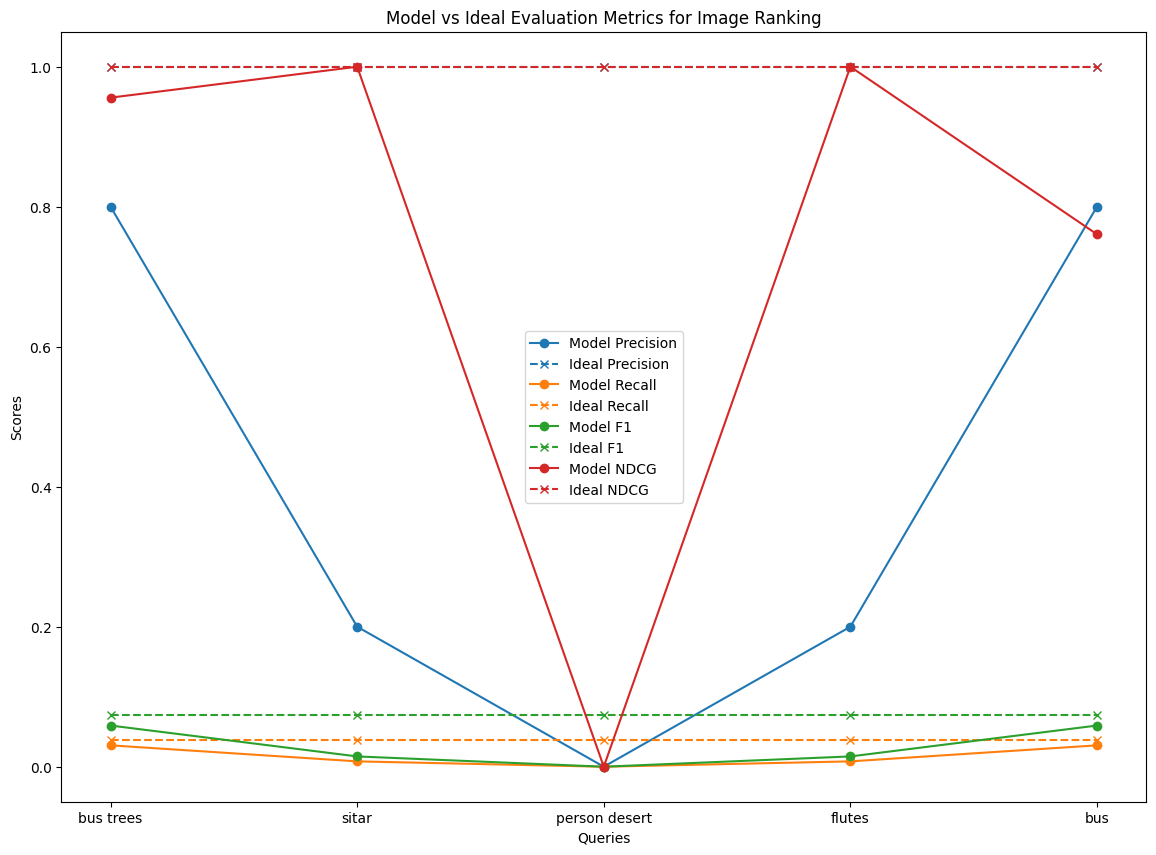

In [19]:
# print(image_tags_mapping.items())

import matplotlib.pyplot as plt
import numpy as np

# Calculate DCG function remains the same
def calculate_dcg(relevances, k):
    return sum((2**rel - 1) / np.log2(i + 2) for i, rel in enumerate(relevances[:k]))

# Evaluate model function modified to return relevance scores as well
def evaluate_model(query, relevance_data, top_k=10):
    # Model's ranked list
    ranked_images = rank_images(query, 0.4)
    ranked_image_names = [img for img, _ in ranked_images[:top_k]]

    # Create binary relevance scores for model's ranked list
    model_relevance_scores = []
    for img in ranked_image_names:
        model_relevance_scores.append(int(any(tag in query for tag in relevance_data[img])))

    # Ideal ranked list based on relevance data
    ideal_ranking = sorted(
        relevance_data.keys(),
        key=lambda img: int(any(tag in query for tag in relevance_data[img])),
        reverse=True
    )
    ideal_ranking = ideal_ranking[:top_k]

    # Binary relevance scores for ideal ranking
    ideal_relevance_scores = [
        int(any(tag in query for tag in relevance_data[img])) for img in ideal_ranking
    ]

    # Calculate metrics for model ranking
    precision_model = sum(model_relevance_scores) / top_k
    recall_model = sum(model_relevance_scores) / len(relevance_data)
    f1_model = 2 * (precision_model * recall_model) / (precision_model + recall_model) if (precision_model + recall_model) > 0 else 0
    dcg_model = calculate_dcg(model_relevance_scores, top_k)
    idcg_model = calculate_dcg(sorted(model_relevance_scores, reverse=True), top_k)
    ndcg_model = dcg_model / idcg_model if idcg_model > 0 else 0

    # Calculate metrics for ideal ranking
    precision_ideal = sum(ideal_relevance_scores) / top_k
    recall_ideal = sum(ideal_relevance_scores) / len(relevance_data)
    f1_ideal = 2 * (precision_ideal * recall_ideal) / (precision_ideal + recall_ideal) if (precision_ideal + recall_ideal) > 0 else 0
    dcg_ideal = calculate_dcg(ideal_relevance_scores, top_k)
    idcg_ideal = calculate_dcg(sorted(ideal_relevance_scores, reverse=True), top_k)
    ndcg_ideal = dcg_ideal / idcg_ideal if idcg_ideal > 0 else 0

    return {
        'model': (precision_model, recall_model, f1_model, ndcg_model),
        'ideal': (precision_ideal, recall_ideal, f1_ideal, ndcg_ideal)
    }

# Evaluate metrics for each query and store results for both model and ideal rankings
queries = ["bus trees", "sitar", "person desert", "flutes", "bus"]
metrics_model = {'Precision': [], 'Recall': [], 'F1': [], 'NDCG': []}
metrics_ideal = {'Precision': [], 'Recall': [], 'F1': [], 'NDCG': []}

for query in queries:
    results = evaluate_model(query, relevance_data, top_k=5)

    # Append model metrics
    metrics_model['Precision'].append(results['model'][0])
    metrics_model['Recall'].append(results['model'][1])
    metrics_model['F1'].append(results['model'][2])
    metrics_model['NDCG'].append(results['model'][3])

    # Append ideal metrics
    metrics_ideal['Precision'].append(results['ideal'][0])
    metrics_ideal['Recall'].append(results['ideal'][1])
    metrics_ideal['F1'].append(results['ideal'][2])
    metrics_ideal['NDCG'].append(results['ideal'][3])

# Plotting the metrics
plt.figure(figsize=(14, 10))
for metric in metrics_model.keys():
    plt.plot(queries, metrics_model[metric], label=f'Model {metric}', marker='o', linestyle='-', color=f'C{list(metrics_model.keys()).index(metric)}')
    plt.plot(queries, metrics_ideal[metric], label=f'Ideal {metric}', marker='x', linestyle='--', color=f'C{list(metrics_model.keys()).index(metric)}')

plt.xlabel("Queries")
plt.ylabel("Scores")
plt.title("Model vs Ideal Evaluation Metrics for Image Ranking")
plt.legend()
plt.show()


In [20]:
# Calculate DCG function remains the same
def calculate_dcg(relevances, k):
    return sum((2**rel - 1) / np.log2(i + 2) for i, rel in enumerate(relevances[:k]))

# Evaluate model function modified to return relevance scores and ranked lists
def evaluate_model(query, relevance_data, top_k=10):
    # Model's ranked list
    ranked_images = rank_images(query, 0.4)
    ranked_image_names = [img for img, _ in ranked_images[:top_k]]

    # Create binary relevance scores for model's ranked list
    model_relevance_scores = []
    for img in ranked_image_names:
        model_relevance_scores.append(int(any(tag in query for tag in relevance_data[img])))

    # Ideal ranked list based on relevance data
    ideal_ranking = sorted(
        relevance_data.keys(),
        key=lambda img: int(any(tag in query for tag in relevance_data[img])),
        reverse=True
    )
    ideal_ranking = ideal_ranking[:top_k]

    # Binary relevance scores for ideal ranking
    ideal_relevance_scores = [
        int(any(tag in query for tag in relevance_data[img])) for img in ideal_ranking
    ]

    return {
        'model_ranking': [(img, score) for img, score in zip(ranked_image_names, model_relevance_scores)],
        'ideal_ranking': [(img, score) for img, score in zip(ideal_ranking, ideal_relevance_scores)]
    }

# Evaluate and print the ranked lists for each query
queries = ["bus trees", "sitar", "person desert", "flutes", "bus"]
for query in queries:
    results = evaluate_model(query, relevance_data, top_k=5)

    print(f"Query: {query}")
    print("Model's Ranked List:")
    for img, relevance in results['model_ranking']:
        print(f"  {img} - Relevance: {relevance}")
    print("Ideal Ranked List:")
    for img, relevance in results['ideal_ranking']:
        print(f"  {img} - Relevance: {relevance}")
    print("\n" + "="*50 + "\n")


Query: bus trees
Model's Ranked List:
  image4.jpg - Relevance: 1
  image1.jpg - Relevance: 1
  image3188.jpg - Relevance: 0
  image27.jpg - Relevance: 1
  image16.jpg - Relevance: 1
Ideal Ranked List:
  image1.jpg - Relevance: 1
  image4.jpg - Relevance: 1
  image5.jpg - Relevance: 1
  image16.jpg - Relevance: 1
  image27.jpg - Relevance: 1


Query: sitar
Model's Ranked List:
  image34.jpg - Relevance: 1
Ideal Ranked List:
  image2.jpg - Relevance: 1
  image6.jpg - Relevance: 1
  image7.jpg - Relevance: 1
  image8.jpg - Relevance: 1
  image10.jpg - Relevance: 1


Query: person desert
Model's Ranked List:
Ideal Ranked List:
  image1.jpg - Relevance: 1
  image9.jpg - Relevance: 1
  image12.jpg - Relevance: 1
  image17.jpg - Relevance: 1
  image18.jpg - Relevance: 1


Query: flutes
Model's Ranked List:
  image3.jpg - Relevance: 1
  image11.jpg - Relevance: 0
  image34.jpg - Relevance: 0
  image12.jpg - Relevance: 0
  image10.jpg - Relevance: 0
Ideal Ranked List:
  image3.jpg - Relevance: